<a href="https://colab.research.google.com/github/Bharathsujay/Voice-of-the-Customer-VoC-Automated-Sentiment-Analysis-Key-Issue-Extraction-Tool/blob/main/Automated_Sentiment_Analysis_%26_Key_Issue_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from textblob import TextBlob
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/voc_feedback.csv")
print("Sample Data:")
print(data.head())

Sample Data:
   feedback_id                                  customer_feedback
0            1  The delivery was very late and the support tea...
1            2  I love the product! It works perfectly and the...
2            3  The app keeps crashing every time I open it. V...
3            4           Customer service was polite and helpful.
4            5  Not satisfied with the billing process. Too co...


In [4]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [13]:
positive_feedbacks = data[data['Sentiment'] == 'Positive']
print("\nPositive Feedbacks:")
print(positive_feedbacks[['customer_feedback', 'Sentiment']])


Positive Feedbacks:
                                    customer_feedback Sentiment
1   I love the product! It works perfectly and the...  Positive
5                Fast delivery and excellent quality!  Positive
8   Great experience overall. Will recommend to ot...  Positive
9       Prices are too high compared to other brands.  Positive
11  Customer care quickly resolved my issue. Very ...  Positive
13  The new update made the app much faster and ea...  Positive
14  The packaging was damaged but the product was ...  Positive
16            Ordering process was smooth and simple.  Positive
18  Love the new design of the product. Looks prem...  Positive
19    The website frequently crashes during checkout.  Positive
23  The pricing is fair and the discounts are attr...  Positive
26       Delivery person was polite and professional.  Positive
28  Absolutely love the performance and battery life.  Positive
30  Product arrived earlier than expected. Great s...  Positive
33  Excellent produ

In [14]:
negative_feedbacks = data[data['Sentiment'] == 'Negative']
print("\nNegative Feedbacks:")
print(negative_feedbacks[['customer_feedback', 'Sentiment']])


Negative Feedbacks:
                                    customer_feedback Sentiment
0   The delivery was very late and the support tea...  Negative
2   The app keeps crashing every time I open it. V...  Negative
4   Not satisfied with the billing process. Too co...  Negative
7          Website is confusing and hard to navigate.  Negative
10  Product quality is poor compared to my previou...  Negative
15               Support team was rude and unhelpful.  Negative
17                   Refund took too long to process.  Negative
29        The return policy is confusing and unclear.  Negative
31     Too many ads in the mobile app. Very annoying.  Negative
32  Very disappointed with the durability of the p...  Negative
35     Delivery charges are too high for small items.  Negative
39  Not happy with the color difference from what ...  Negative


In [5]:
data["Sentiment"] = data["customer_feedback"].apply(get_sentiment)

# Sentiment summary
sentiment_counts = data["Sentiment"].value_counts()
print("\nSentiment Summary:")
print(sentiment_counts)



Sentiment Summary:
Sentiment
Positive    17
Negative    12
Neutral     11
Name: count, dtype: int64


In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
def extract_keywords(text):
    doc = nlp(text)
    keywords = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN"]]
    return " ".join(keywords)

data["Keywords"] = data["customer_feedback"].apply(extract_keywords)

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data["Keywords"])

num_clusters = 3  # adjustable
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)

In [9]:
print("\nClustered Issues:")
print(data[["customer_feedback", "Cluster"]])


Clustered Issues:
                                    customer_feedback  Cluster
0   The delivery was very late and the support tea...        1
1   I love the product! It works perfectly and the...        0
2   The app keeps crashing every time I open it. V...        0
3            Customer service was polite and helpful.        0
4   Not satisfied with the billing process. Too co...        0
5                Fast delivery and excellent quality!        0
6        Received a defective item. Had to return it.        2
7          Website is confusing and hard to navigate.        0
8   Great experience overall. Will recommend to ot...        0
9       Prices are too high compared to other brands.        0
10  Product quality is poor compared to my previou...        0
11  Customer care quickly resolved my issue. Very ...        1
12  Shipping was delayed for two weeks. Unacceptab...        0
13  The new update made the app much faster and ea...        0
14  The packaging was damaged but th

/tmp/ipython-input-1361273195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data, palette="coolwarm")


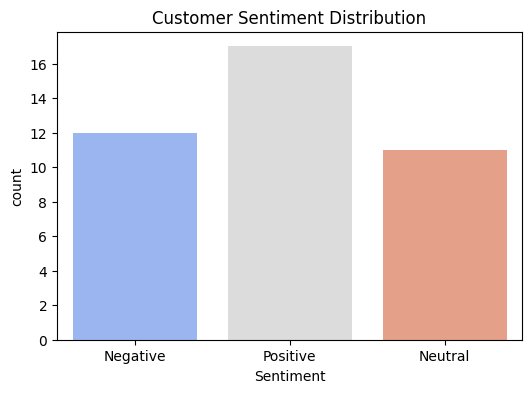

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=data, palette="coolwarm")
plt.title("Customer Sentiment Distribution")
plt.show()

In [11]:
data.to_csv("voc_analysis_results.csv", index=False)
print("\nResults saved as voc_analysis_results.csv")


Results saved as voc_analysis_results.csv


In [17]:
data=pd.read_csv("/content/voc_analysis_results.csv")

In [18]:
data.head(10)

,feedback_id,customer_feedback,Sentiment,Keywords,Cluster
0,1,The delivery was very late and the support tea...,Negative,delivery support team,1
1,2,I love the product! It works perfectly and the...,Positive,product packaging,0
2,3,The app keeps crashing every time I open it. V...,Negative,app time,0
3,4,Customer service was polite and helpful.,Neutral,customer service,0
4,5,Not satisfied with the billing process. Too co...,Negative,billing process,0
5,6,Fast delivery and excellent quality!,Positive,delivery quality,0
6,7,Received a defective item. Had to return it.,Neutral,item,2
7,8,Website is confusing and hard to navigate.,Negative,website,0
8,9,Great experience overall. Will recommend to ot...,Positive,experience other,0
9,10,Prices are too high compared to other brands.,Positive,price brand,0


from matplotlib import pyplot as plt
_df_0['feedback_id'].plot(kind='hist', bins=20, title='feedback_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='feedback_id', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['feedback_id']
  ys = series['Cluster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('feedback_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('feedback_id')
_ = plt.ylabel('Cluster')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['feedback_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'feedback_id'}, axis=1)
              .sort_values('feedback_id', ascending=True))
  xs = counted['feedback_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('feedback_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('feedback_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['feedback_id'].plot(kind='line', figsize=(8, 4), title='feedback_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='feedback_id', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Cluster', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)